# Notes for lecture
Image classifiers are used a lot. <br>
Keeping NSFW content from being uploaded to social media site or forum.<br>
Cancer detection used to spot tumors, more accurate than MRI or X-ray.<br>
Convert handwritten letters to digital text. Postal service uses this.<br>

What does an image look lik eto a computer? Normally images are two dimensional array of pixesl, X and Y value. <br>
ML cannot accept 2D data. Flatten the image to 1D array. A 28x28 == 784x1. Just one row.<br>
Can not accept multiple rows and columns for one value. So we must flatten the image. <br>
Image is unrecognizable to us but computer can see it and learn that this is a numebr 3.<br>
Neural networks CAN accept 2D arrays for images, but we will not talk about that for now.<br>

Support vecotr machines SVMs. New model, has benefits and drawbacks. <br>
****** **Pros** *******, used for classification or regression. Great for out of the box issues. DOnt need to tune hyper parameters. Handle nonlinear data very well. Not prone to outliers. Works well with small datasets.<br>
Recap, great for using when getting the right answer is MORE than understadning WHY you got the right ansewr.<br>
****** **Cons** ******- do NOT give us udnerstanding of data. SVMs hard to inerpret. No answer as to WHY our model works (no feature importances). COmputationally expensive, slow to train or predict new data. Does not scale well with MASSIVE data sets. Works better with small data (due to computation costs). Doesnt give predicted probability, can only estimate is using cross valdiation. <br>

Support vectors are data points that are closest to each other of different classes. Think of classifying something as red or green. THe two or three points that are CLOSEST to each other but in different classes. So it draaws the decision boundary line.<br>
Marginbs - distance of data points of boundary line. SVMs draw decision line by finding max margin distance.<br>
Soft margins. This allows soft margins to allow purposeful misclassificaiton s to nadle outliers. THink red dot near the green dots. WIll still make good classification and not count the red dot. WE can set the parameter by setting the C value. NOT RECOMMENDED TO CHANGE HYPER PARAMETER.<br>

SVMs are tircky, has Kernel tricks. THis adds dimensionality to data. Lets look at example of data that not linearly separable<br>
red, red, gren, green, green, red, red, red. Cant separate with one line.<br>
By adding dimensionality to data, it can figure out new ways to split data. Here by taking square of x-value , we can linearly separate two classes. Looks like a nice curve so we can draw on eline. THis is literally like a trick. Does it automatically.<br>
So x axis is x-values. Y axis is x-squared.<br>

Even more dimensions sow e have this two dimensional example where we have pretty much two circles of data points. Cant draw a line. If we have a THIRD dimension you can see a CLEAR difference in height with the two kinds of point so we can draw our line here.<br>

Most common kernel tricks - Linear Kernels, Polynomial Kernels, and Radial Bias Function Kernels (RBF).<br>
Reiterate pros and cons LOK AT THEM again!<br>

In [2]:
# For data management
import pandas as pd
import numpy as np

# Import classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline 


# Image Classification

### Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.


# 1. Inspect and explore our data

In [3]:
df = pd.read_csv('data/digits-small.csv')
df.head()
# Google MNIST database, you can see handwritten digits thats what we will classify

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Inspect for null values

In [4]:
df.shape #4200, 785

(4200, 785)

In [5]:
df.isnull().sum() #we have 784 columns. Wow! Hard to look at all of them.s

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [6]:
df.isnull().sum().sum() #sanity check so we can just print out instead of manually look
#if there WAS a null, we would just do dropnull

0

### Check for duplicates

In [5]:
# Check for duplicates
df.duplicated().sum()

0

### Lets look at our class balances

In [6]:
df.label.value_counts(), df.label.value_counts(normalize=True)
#why check this? Check for the balance. Think we have lets say 10K rows with a number 1
# then only 50 of each other number, that is super unbalanced. Will train dataset wrong
#the normalize version just tunrs all this into percentages. Seems pretty balanced.
# If one of the labels was like 40%, then model is unbalanced, will be BIASED!

(1    440
 0    439
 7    437
 9    433
 2    425
 3    415
 6    410
 5    408
 4    398
 8    395
 Name: label, dtype: int64,
 1    0.104762
 0    0.104524
 7    0.104048
 9    0.103095
 2    0.101190
 3    0.098810
 6    0.097619
 5    0.097143
 4    0.094762
 8    0.094048
 Name: label, dtype: float64)

# Lets visualize one of the images...

In [7]:
df.head() #this tells us nothing! Remember, the image is broken down into many rows so its hard
# to visualize for us humans

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### First, we need to create a list that is just our pixel columns

In [8]:
# This grabs ALL of the columns 
pixel_cols = df.columns #grabs the neames off the columns. Has this weird Index type obejkct

# This is currently a pandas index object
print(type(pixel_cols)) #this prints the tpye its a pandas. whatever. COnvert to a list instead.

# Convert the pandas index object into a regular list
pixel_cols = list(pixel_cols)

# Sanity check that it is now just a list.
print(type(pixel_cols)) #make sure it works

# Remove the label column from the list
# So all that remains are the pixel columns
# This happnes 'in place'
pixel_cols.remove('label') #we know we can remove items from the list

#pixel_cols

<class 'pandas.core.indexes.base.Index'>
<class 'list'>


# Extract one row and reshape it to its original shape.

<class 'numpy.ndarray'>


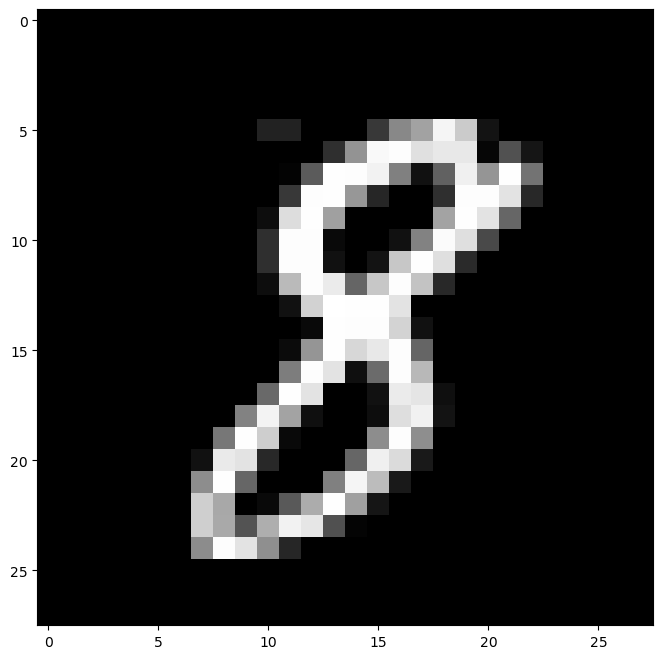

In [9]:
# Set the size of our plot
plt.figure(figsize=(8,8)) #make a plot figure. 


# Select just the pixel columns and convert them to a numpy array by using .values. 
imgs = df[pixel_cols].values #extract only pixel values. This returns the images. Array of arrays

print(type(imgs)) #this shows this is a numpy array

# Select just one image from 
img = imgs[999] #randomly selected image number 999. Again we want ONE image. What does the one row of data look like
# THis is greyscale image so 0 is black, 256 is white, inbetween is grey. 

# Reshape the image to be a 28x28 matrix (original format of image)
img = img.reshape(28,28) #print it to be 28 by 28 pixels. Now instead of one array, it is an array of arrays (of 28 arrays each with 28 elements)

# Plot reshaped image
plt.imshow(img, cmap='gray')

In [10]:
img #just so we can see what it looks like to a computer

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  34,  34,   0,
          0,   0,  57, 136, 162, 245, 203,  19,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
# Print the dimensions and type of the image
print(img.shape, type(img))

# Flatten the image using .flatten()
flat_image = img.flatten()

# Print the dimensions and type of the flat image
print(flat_image.shape, type(flat_image))

(28, 28) <class 'numpy.ndarray'>
(784,) <class 'numpy.ndarray'>


## What does the image look like if we dont reshape the image..?  
This is what the classifier will be 'seeing'.

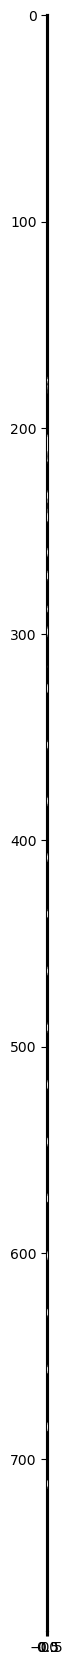

In [12]:
plt.figure(figsize=(8,21))

# Select just one image from 
img = imgs[9]

# Reshape the image to be a 784 by 1 
img = img.reshape(784,1)

# Plot reshaped image
plt.imshow(img, cmap='gray') #this is what the computer sees. One image but flattened

## Small detour on loading images.

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'> (563, 1000)
<class 'numpy.ndarray'> (563000,)


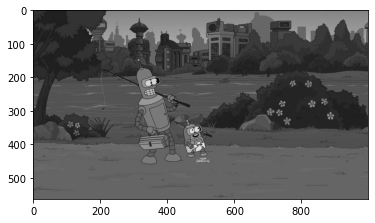

In [15]:
import PIL #images are already in data format (csv file) usually we will get the image as actaul image file

# PIL is a library for handling images in python. Picture Image Loader
image = PIL.Image.open('data/bender-and-baby.jpeg') #feeding actual image
print(type(image))

# Plot the image using matplotlib
plt.imshow(image, cmap='gray')  #prints actual image so cool!


# Convert the image to a numpy array of data. 
image_data = np.asarray(image).copy() #np.asarray, will be an array of arrays with all values in it

print(type(image_data), image_data.shape) 


flat_image = image_data.flatten() #feeding into machine learning model, FLATTEN the image
print(type(flat_image), flat_image.shape)
# we are working with 28x28 pixel images SO SMALL. But today standards, an iphone can take like a 2000 pixel by 2000 pixel image!
# Another note, if you train the model with 28x28 but get new image that is 500x500. You MUST RESCALE
# scikit images, whole library dedicated to do image processing in python. Will not cover in this class

___
# 2. Select and engineer our features.
1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 
2. Define our `X` and `y` data. 
2. Train-test-split our `X` and `y` data

### 1. Create our `selected_features` that is the list of the columns we are going to use as our `X` data. 

In [13]:
# IM DOING THIS AGAIN JUST FOR PRACTICE 

# This grabs all of the columns 
selected_features = df.columns

# This is currently a pandas index object
print(type(selected_features))

# Convert the pandas index object into a regular list
selected_features = list(selected_features) #convert to list

# Sanity check that it is now just a list.
print(type(selected_features))

# Remove the label column from the list
# So all that remains are the pixel columns
# This happnes 'in place'
selected_features.remove('label') #remove label column

# selected_features

<class 'pandas.core.indexes.base.Index'>
<class 'list'>


### 2. Define our `X` and `y`

In [14]:
X = df[selected_features] #x is ALL pixel columns. Y is the label

y = df['label']

In [15]:
# Sanity checking the size of our dataframe / class balances. 
print(df.shape)
df.label.value_counts() #so far all good

(4200, 785)


1    440
0    439
7    437
9    433
2    425
3    415
6    410
5    408
4    398
8    395
Name: label, dtype: int64

### 3. Train-test-split our `X` and `y` data

In [16]:
# 3. Train-test-split our `X` and `y` data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25) #why do train testing? We need part of our data to evaluate our model!

____
# 3. Build and train our model
1. Initalize an empty model.
2. Fit that model. 

In [17]:
from sklearn import svm #make sure to import at the beginning not inline
#support vector machines. LinearSVC, NuSVR, many things to use. We will use default SVC

# Initalize our Support Vector Classifier
model = svm.SVC() 

In [18]:
model.fit(X_train, y_train) #this is computationally expensive, can take some time.

SVC()

___
# 4. Evaluate our model
1. Get a baseline accuracy score.
2. Make new predictions using our test data. 
3. Print the classification report. 
4. Plot the confusion matrix of our predicted results. 

### 1. Make new predictions using our test data. 

In [19]:
accuracy = model.score(X_test, y_test)
print("Accuracy %f" % accuracy) #gives straight accuracy. 95% thats good. 50% accuracy not good

Accuracy 0.956190


In [20]:
# This will not work!!
#model.predict_proba(X_test) 
# #error says predict_proba is NOT available when probability=False
# No available prediction. SVM does NOT offer probability. It says I think its a 1, or a 9. 
# you CAN create artifical probability but not really recommended
# model = svm.SVC(probability=True) #not recommended. 

### 2. Make new predictions using our test data. 

In [21]:
y_pred = model.predict(X_test) #dont be surprised if it takes some time

### 3. Print the classification report. 

In [22]:
print(metrics.classification_report(y_test, y_pred)) #provide y test, the true labels.
# and the y pred, what we THOUGHT it was
# 1 and 1, match up thats correct. Average f1 score of 96% thats good

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       106
           1       0.97      0.98      0.98       117
           2       0.99      0.97      0.98       106
           3       0.93      0.92      0.93       104
           4       0.95      0.94      0.94       100
           5       0.93      0.95      0.94        94
           6       0.96      1.00      0.98       108
           7       0.96      0.98      0.97       102
           8       0.94      0.91      0.93       105
           9       0.93      0.92      0.93       108

    accuracy                           0.96      1050
   macro avg       0.96      0.96      0.96      1050
weighted avg       0.96      0.96      0.96      1050



### 4. Plot the confusion matrix of our predicted results. 

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


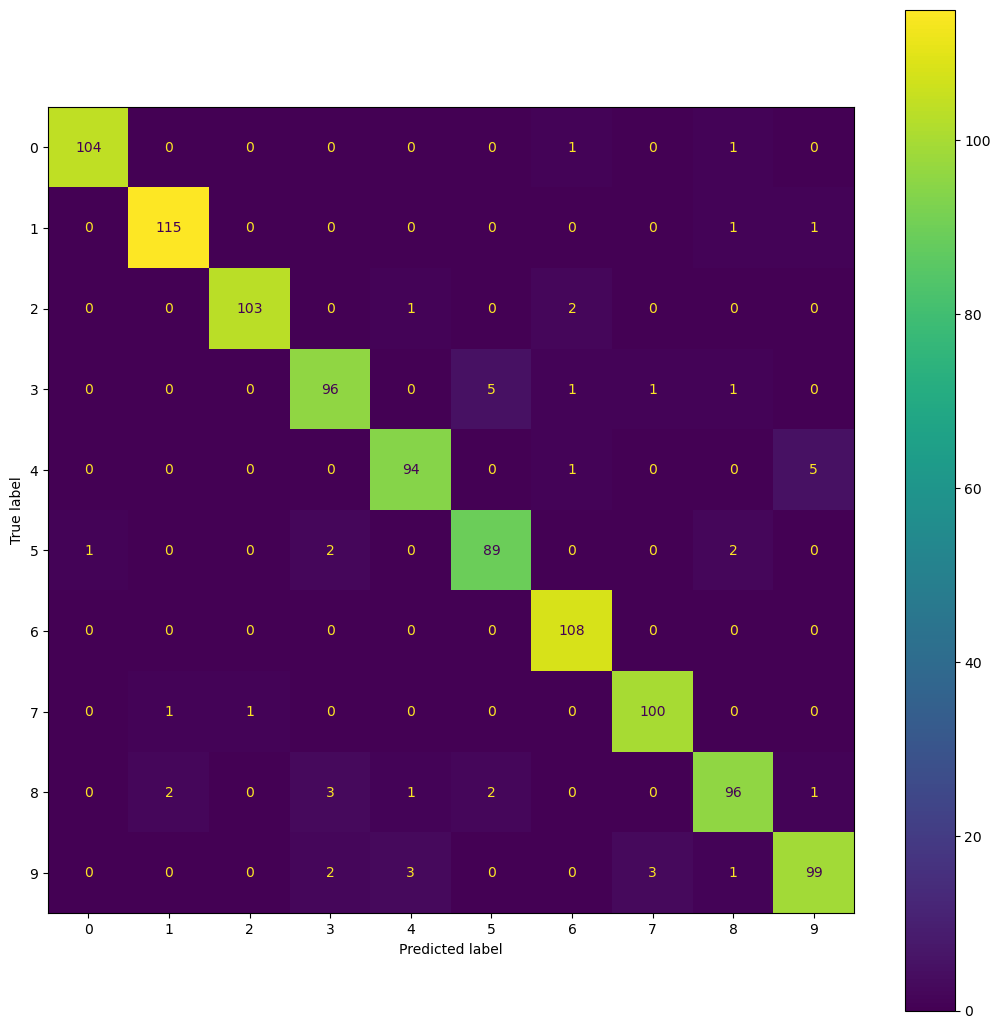

In [23]:
fig, ax = plt.subplots(figsize=(13,13))
metrics.plot_confusion_matrix(estimator=model, 
                              X=X_test, 
                              y_true=y_test, 
                              ax=ax)
# which two things were confused with the most?
# The ones NOT on the line rememerb
# 9 and 4 were confused with the most. Makes sense. 9 kinda looks like a 4! 3s and 5s also got confused with some times

In [24]:
# Lets build a function in which we can easily do all of this for any new model. 

def build_and_eval_model(model, X, y, random_state=23): #pass in model
    print("Running report for model", model)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)     #train it
    
    # Fit our model.
    model.fit(X_train, y_train)
    
    # Get the accuracy
    accuracy = model.score(X_test, y_test)
    print("\n\nAccuracy %f" % accuracy)
    
    
    # Make new predictions
    y_pred = model.predict(X_test)
    
    
    # Print the classification report. 
    print(metrics.classification_report(y_test, y_pred))
    
        
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    
    metrics.plot_confusion_matrix(estimator=model, 
                                  X=X_test, 
                                  y_true=y_test, 
                                  ax=ax)

    # Return the fitted model. 
    return model

Running report for model LogisticRegression()


Accuracy 0.871429
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       115
           1       0.95      0.95      0.95       123
           2       0.82      0.79      0.80       103
           3       0.83      0.77      0.80       100
           4       0.88      0.90      0.89        98
           5       0.80      0.84      0.82       102
           6       0.94      0.90      0.92       114
           7       0.91      0.92      0.92       103
           8       0.79      0.80      0.80        85
           9       0.86      0.84      0.85       107

    accuracy                           0.87      1050
   macro avg       0.87      0.87      0.87      1050
weighted avg       0.87      0.87      0.87      1050



c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression()

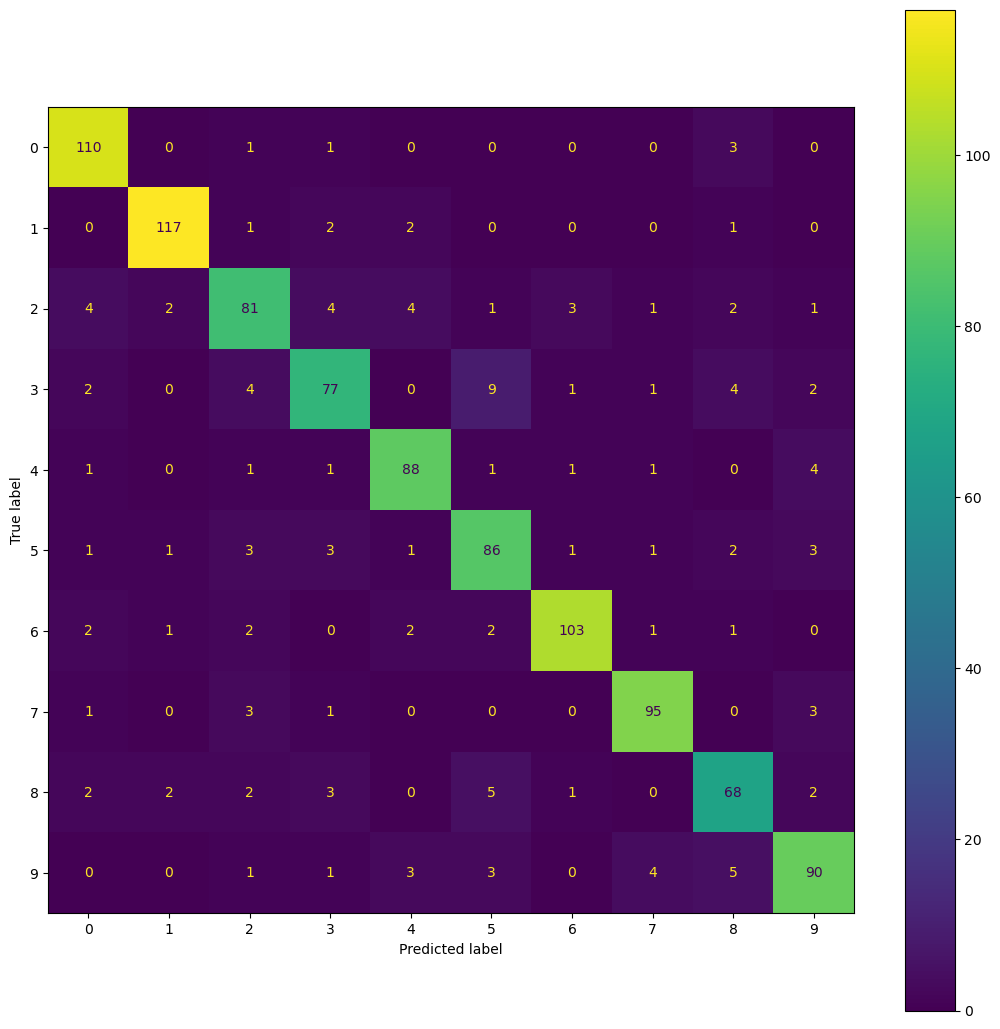

In [25]:
lr = LogisticRegression()
build_and_eval_model(lr, X, y)

Running report for model RandomForestClassifier()


Accuracy 0.917143
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.98      0.97      0.97       123
           2       0.88      0.88      0.88       103
           3       0.91      0.86      0.88       100
           4       0.90      0.91      0.90        98
           5       0.91      0.88      0.90       102
           6       0.93      0.97      0.95       114
           7       0.96      0.87      0.91       103
           8       0.94      0.91      0.92        85
           9       0.85      0.92      0.88       107

    accuracy                           0.92      1050
   macro avg       0.92      0.91      0.92      1050
weighted avg       0.92      0.92      0.92      1050



c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


RandomForestClassifier()

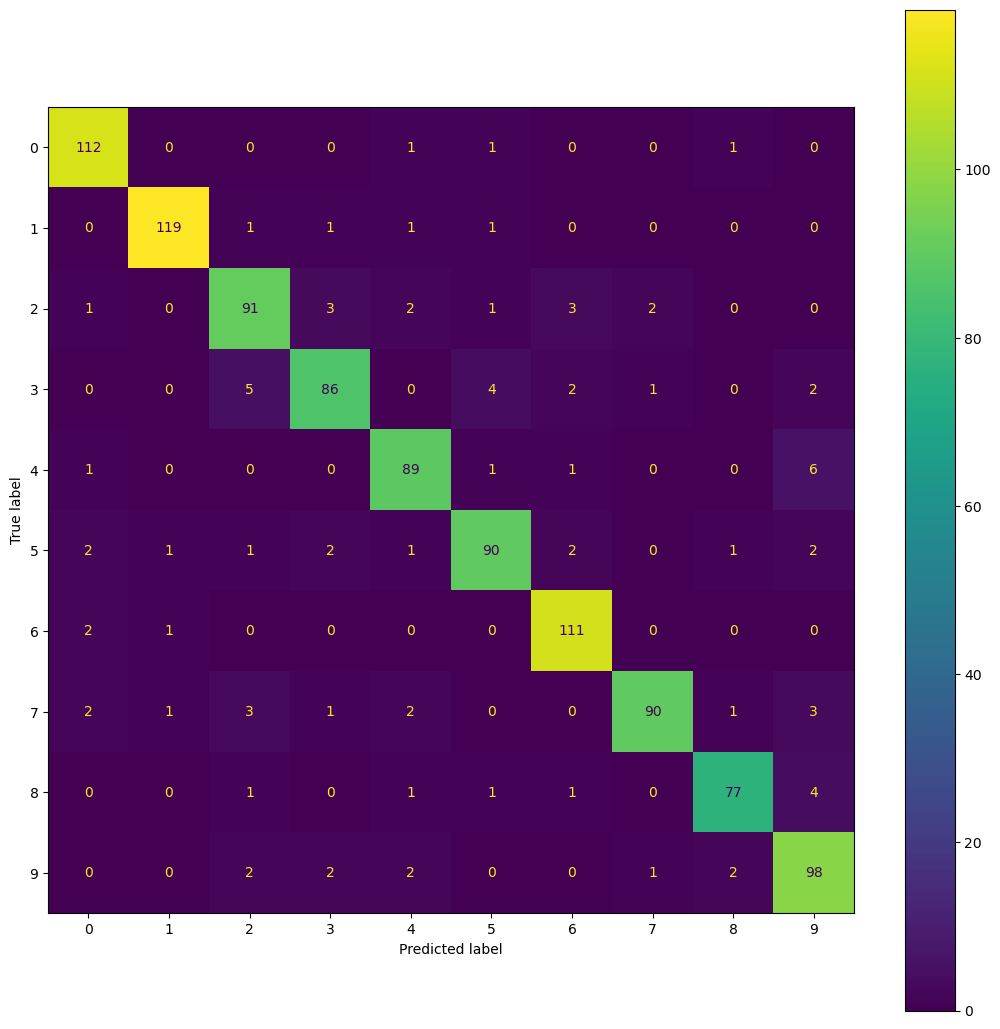

In [26]:
rf = RandomForestClassifier() #same idea with random forest

build_and_eval_model(rf, X, y)

Running report for model LinearSVC()


Accuracy 0.811429
              precision    recall  f1-score   support

           0       0.85      0.92      0.89       115
           1       0.93      0.93      0.93       123
           2       0.76      0.71      0.73       103
           3       0.77      0.74      0.76       100
           4       0.88      0.77      0.82        98
           5       0.83      0.79      0.81       102
           6       0.91      0.92      0.91       114
           7       0.86      0.87      0.87       103
           8       0.61      0.66      0.63        85
           9       0.67      0.72      0.69       107

    accuracy                           0.81      1050
   macro avg       0.81      0.80      0.80      1050
weighted avg       0.81      0.81      0.81      1050



c:\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


LinearSVC()

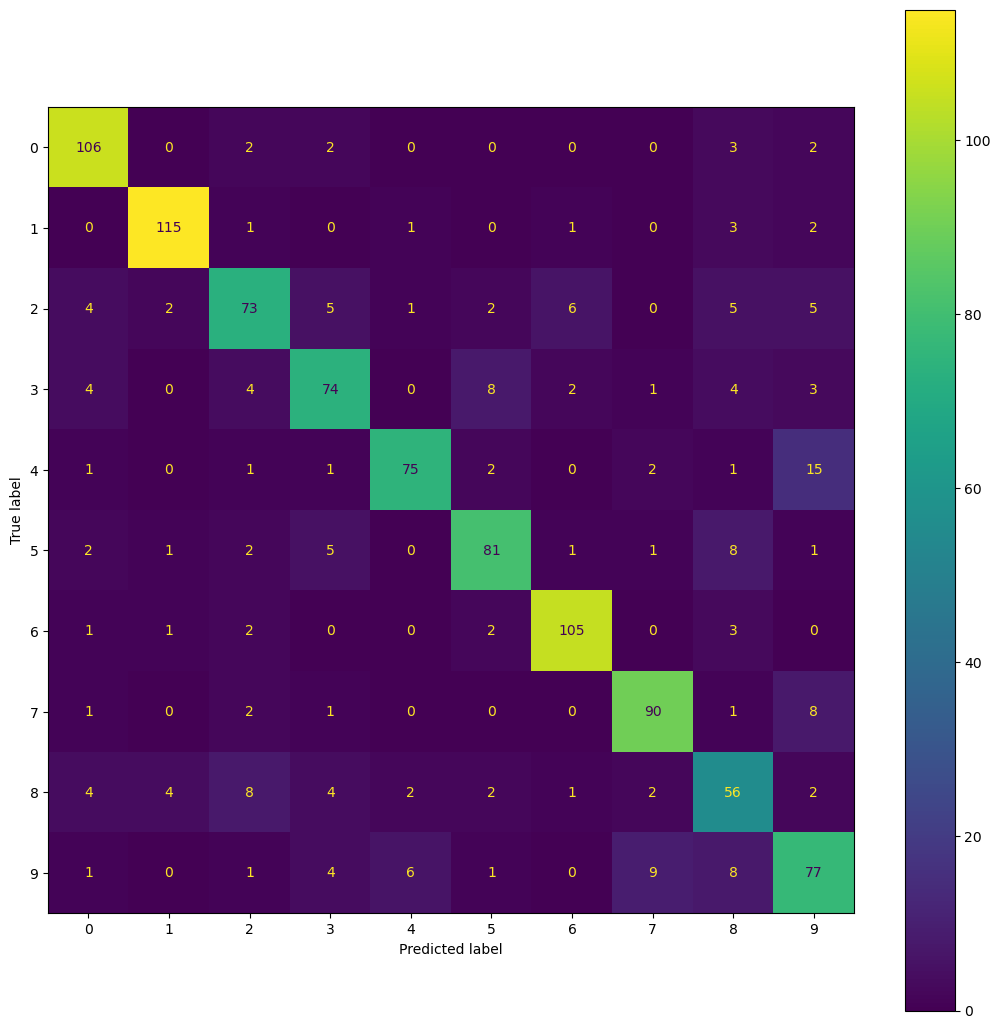

In [27]:
lsvc = svm.LinearSVC() #same as svm.SVC(kernel='linear') but our actual is more optimized

build_and_eval_model(lsvc, X, y) #only like 80% accuracy so not AS good

Running report for model MultinomialNB()


Accuracy 0.823810
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       115
           1       0.93      0.91      0.92       123
           2       0.86      0.83      0.84       103
           3       0.86      0.83      0.85       100
           4       0.72      0.66      0.69        98
           5       0.90      0.68      0.77       102
           6       0.85      0.91      0.88       114
           7       0.94      0.85      0.89       103
           8       0.62      0.80      0.70        85
           9       0.70      0.81      0.75       107

    accuracy                           0.82      1050
   macro avg       0.83      0.82      0.82      1050
weighted avg       0.83      0.82      0.82      1050



c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


MultinomialNB()

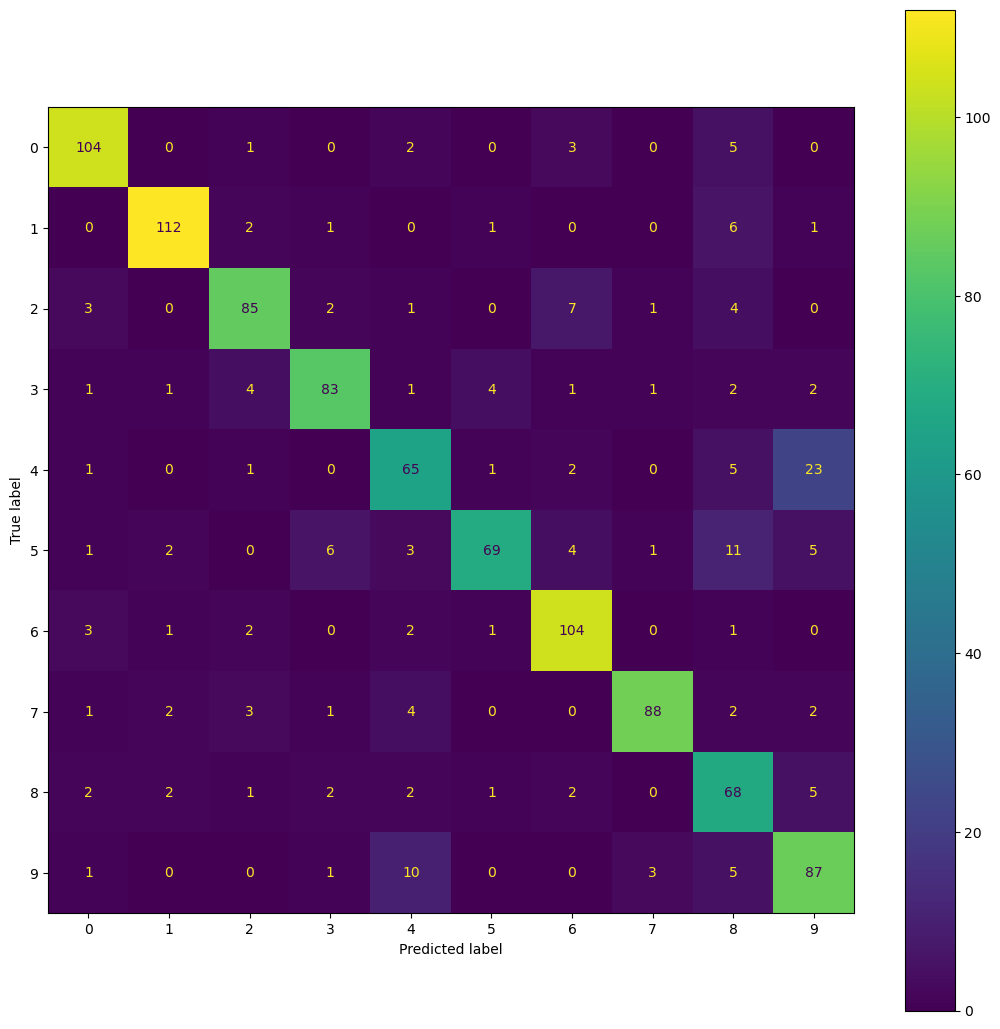

In [28]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
build_and_eval_model(mnb, X, y)

Running report for model SVC()


Accuracy 0.939048
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       115
           1       0.98      0.97      0.97       123
           2       0.91      0.90      0.91       103
           3       0.93      0.88      0.90       100
           4       0.92      0.93      0.92        98
           5       0.92      0.96      0.94       102
           6       0.94      0.98      0.96       114
           7       0.97      0.93      0.95       103
           8       0.95      0.91      0.93        85
           9       0.92      0.93      0.92       107

    accuracy                           0.94      1050
   macro avg       0.94      0.94      0.94      1050
weighted avg       0.94      0.94      0.94      1050



c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


SVC()

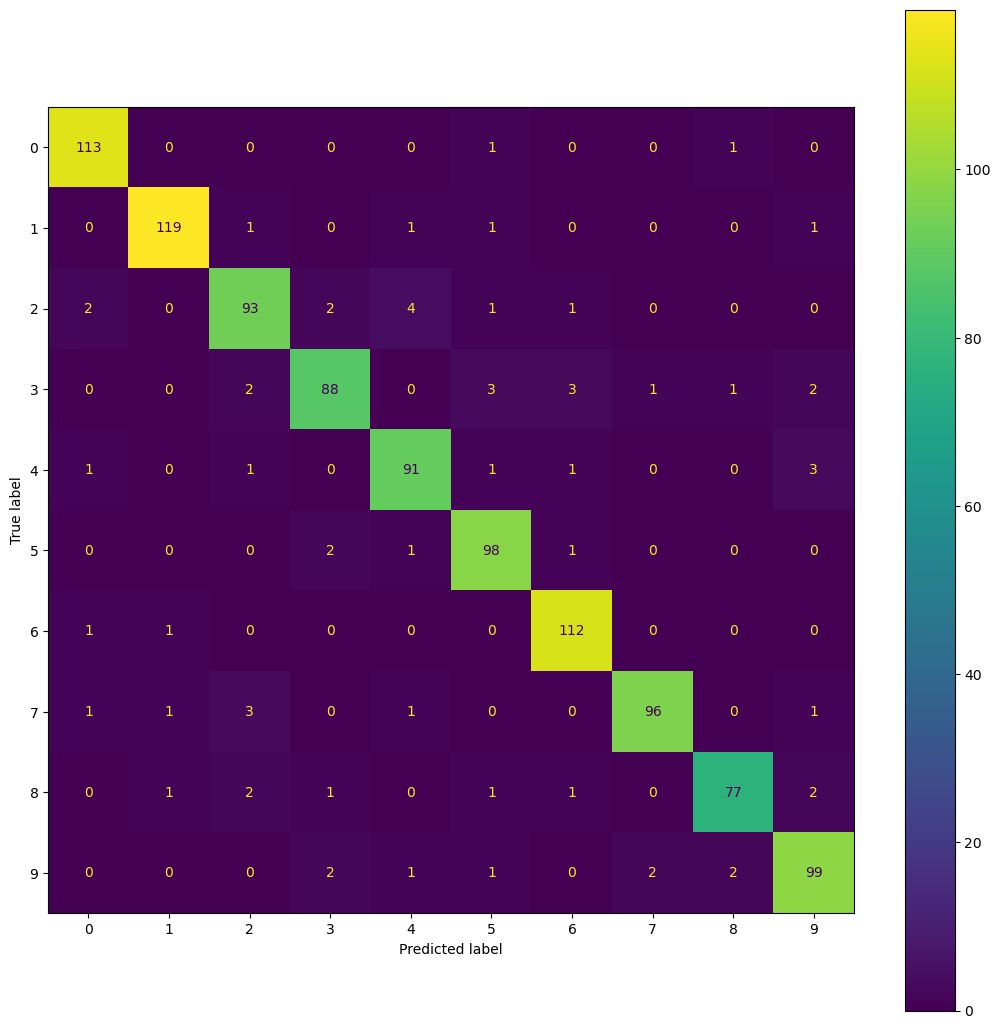

In [29]:
model = svm.SVC() #the one we did before, takes the longest
build_and_eval_model(model, X, y)